### Setup

In [247]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

### EX1 

In [227]:
# global variable 
num_rows=3
num_cols=3
num_actions=4
shapePolicy=(num_rows, num_cols,num_actions)
shapeValue=(num_rows, num_cols)
gamma=0.7
episode_length=20
num_episodes=1000

In [228]:
actions = [up, down, left, right] = [0,1,2,3]

reward_function=np.array([
[[-1., 2/3, -1., 1.], [-1., 2., 1/2, 3/2], [-1., 5/2, 1/2, -1.]],
[[1/3, 3/2, -1., 4/3.], [1/4, 3., 1/3, 3/2], [1/4, 7/2, -1., 1.]],
[[1/2, -1., -1., 3/2], [4/5, -1., 1., 3.], [1/2, -1., 4/5, -1.]],
])

policy1=np.array([
[[0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.]],
[[0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.]],
[[0., 0., 0., 1.], [0., 0., 0., 1.], [0., 0., 0., 1.]],
])

policy2=np.array([
[[0., 0.5, 0., 0.5], [0., 1., 0., 0.], [0., 0.5, 0.5, 0.]],
[[0., 0., 0., 1.], [0.25, 0.25, 0.25, 0.25], [0., 0., 1., 0.]],
[[0.5, 0., 0., 0.5], [1., 0., 0., 0.], [0.5, 0., 0.5, 0.]],
])

policy3=np.full(shapePolicy, 0.25)

**Calculating the state value function**

In [229]:
def isValideState(state):
    return state[0] < num_rows and state[0] >= 0 and state[1] < num_cols and state[1] >= 0

In [230]:
def transition(oldState,action):
    newState = (0,0)
    if action == up : 
        newState = (oldState[0] - 1, oldState[1])
    elif action == down : 
        newState = (oldState[0] + 1, oldState[1])
    elif action == left : 
        newState = (oldState[0], oldState[1] - 1)
    elif action == right : 
        newState = (oldState[0], oldState[1] + 1)
    if isValideState(newState):
        return newState
    else :
        return oldState

In [231]:
def select_action(state,policy)->int:
    prob_action = policy[state]
    action = np.random.choice(actions,p=prob_action)
    return action

In [232]:
np.random.choice(actions,p=policy3[(0,0)])

3

In [233]:
def displayAction(action):
    if action == up:
        print("↑",end="")
    elif action == down:
        print("↓",end="")
    elif action == left:
        print("←",end="")
    elif action == right:
        print("→",end="")
def displayTraj(trajectory):
    print("\nTrajectory : ",end="")
    for i in trajectory:
        displayAction(i[1])

In [234]:

def trajectory(policy,initState=(0,0),showAction=False):
    """_summary_

    Args:
        policy : policy to follow
        initState: the initial state of the trajectory

    Returns:
        trajectory: list of tuple (state,action,newState)
    """
    state = initState if isValideState(initState) else (0,0)
    trajectory = []
    for i in range(episode_length):
        action = select_action(state,policy)
        if showAction:
            displayAction(action)
        newState = transition(state,action)
        trajectory.append((state,action,newState))
        state = newState
    return trajectory

In [235]:
displayTraj(trajectory(policy3,(0,0),showAction=True))

→↓↑↓↑→↑↑↓↓→↓↑→↑→↓←→↓
Trajectory : →↓↑↓↑→↑↑↓↓→↓↑→↑→↓←→↓

**The formulas**
$$
V_\pi(s) = \Epsilon_\pi[G_t \, | \, S_t=s]
\\
G_t = R_{t+1} + \gamma G_{t+1}
$$

In [236]:
def getReward(state,action):
    return reward_function[state][action]

def getReturn(trajectory):
    """_summary_

    Args:
        trajectory : list of tuple (state,action,newState)

    Returns:
        return: the return of the trajectory
    """
    return np.sum([gamma**i * getReward(trajectory[i][0],trajectory[i][1]) for i in range(len(trajectory))])
def getValueFunction(trajectory):
    """_summary_

    Args:
        trajectory : list of tuple (state,action,newState)

    Returns:
        actionFunction: the action function of the trajectory
    """
    return getReturn(trajectory) / len(trajectory)

In [237]:
getValueFunction(trajectory(policy2,(1,2)))

0.01763158045364623

In [250]:
# save history
policy1_value_function = []
policy2_value_function = []
policy3_value_function = []

for episode in tqdm(range(num_episodes)):
    policy1_value_function.append(getValueFunction(trajectory(policy=policy1)))
    policy2_value_function.append(getValueFunction(trajectory(policy=policy2)))
    policy3_value_function.append(getValueFunction(trajectory(policy=policy3)))
    
        

100%|██████████| 1000/1000 [00:01<00:00, 648.87it/s]


**Plotting**

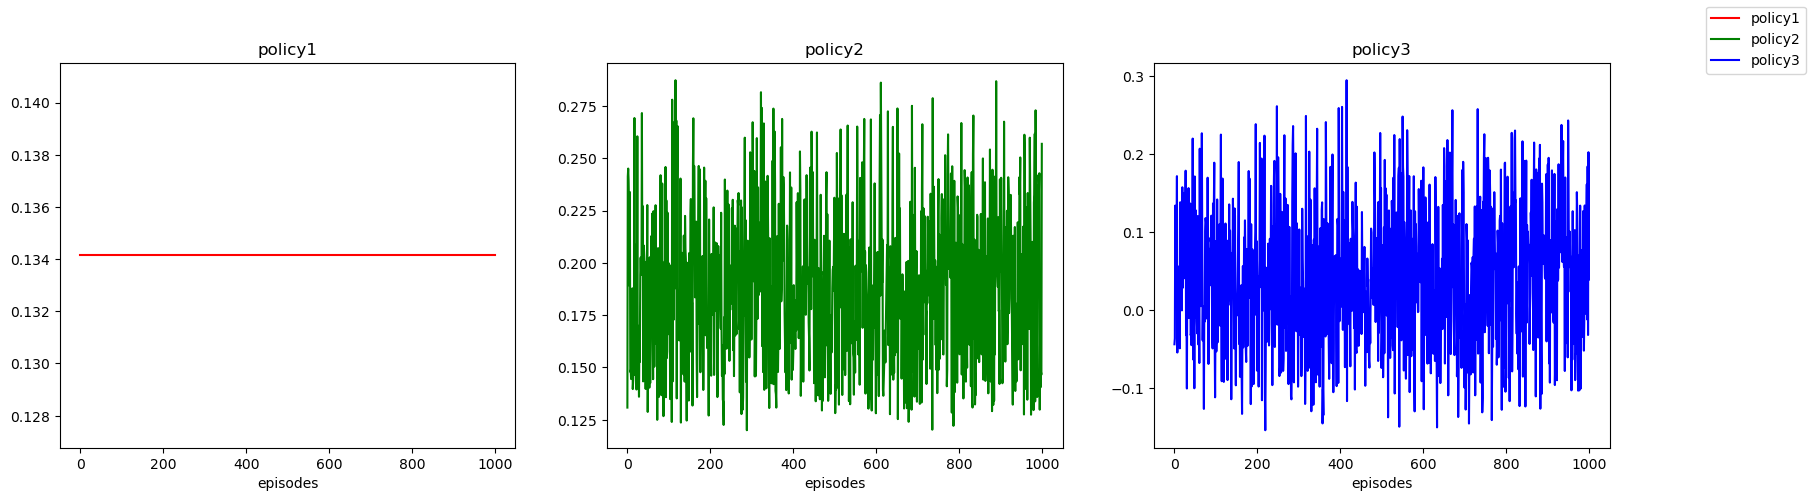

In [256]:
fig,axs = plt.subplots(1,3,figsize=(20,5))

for i in range(3):
    axs[i].set_title("policy"+str(i+1))
    axs[i].set_xlabel("episodes")

axs[0].plot(policy1_value_function,label="policy1",color="red")
axs[1].plot(policy2_value_function,label="policy2",color="green")
axs[2].plot(policy3_value_function,label="policy3",color="blue")

fig.legend()

### Exo 2

In [239]:
def v1_a1(v1,v2):
    return -0.4 + 0.56 * v1 + 0.24 * v2

In [240]:
def v1_a2(v1,v2):
    return -0.1 + 0.64 * v1 + 0.16 * v2

In [241]:
def v2_a1(v1,v2):
    return -0.475 + 0.72 * v1 + 0.08 * v2

In [242]:
def v2_a2(v1,v2):
    return 0.4* v1 + 0.4 * v2

In [243]:
#  init the state value function
v1=v2 = 0

v1_pre=v2_pre = -1.
i=0
while(v1!=v1_pre or v2!=v2_pre):
    i+=1 
    v1_pre = v1
    v2_pre = v2
    print(f'Iteration {i} v1={v1} v2={v2}')
    v1 = np.max([v1_a1(v1,v2),v1_a2(v1,v2)])
    v2 = np.max([v2_a1(v1,v2),v2_a2(v1,v2)])
   

Iteration 1 v1=0 v2=0
Iteration 2 v1=-0.1 v2=-0.04000000000000001
Iteration 3 v1=-0.1704 v2=-0.08416
Iteration 4 v1=-0.2225216 v2=-0.12267264000000001
Iteration 5 v1=-0.26204144640000004 v2=-0.15388563456000004
Iteration 6 v1=-0.2923282272256001 v2=-0.17848554471424005
Iteration 7 v1=-0.3156477525786625 v2=-0.19765331891716104
Iteration 8 v1=-0.3336390926770898 v2=-0.21251696463770037
Iteration 9 v1=-0.34753173365536955 v2=-0.22401947931722796
Iteration 10 v1=-0.35826342623019297 v2=-0.2329131622189684
Iteration 11 v1=-0.3665546987423584 v2=-0.23978714438453072
Iteration 12 v1=-0.3729609502966343 v2=-0.245099237872466
Iteration 13 v1=-0.3779108862494406 v2=-0.24920404964876267
Iteration 14 v1=-0.381735615143444 v2=-0.25237586591688266
Iteration 15 v1=-0.3846909322385054 v2=-0.2548267192621553
Iteration 16 v1=-0.3869744717145884 v2=-0.2567204763906975
Iteration 17 v1=-0.38873893811984817 v2=-0.2581837658042183
Iteration 18 v1=-0.3901023229253778 v2=-0.2593144354918384
Iteration 19 v1=-0

In [244]:
(v1_a1(v1,v2),
v1_a2(v1,v2),
v2_a1(v1,v2),
v2_a2(v1,v2),
)


(-0.6842105263157894,
 -0.394736842105263,
 -0.7802631578947367,
 -0.263157894736842)

In [245]:
optPs1 = "A1" if v1_a1(v1,v2) > v1_a2(v1,v2) else "A2" 
optPs2 = "A1" if v2_a1(v1,v2) > v2_a2(v1,v2) else "A2"

print(f'optimal policy for state 1 is {optPs1}')
print(f'optimal policy for state 2 is {optPs2}')

optimal policy for state 1 is A2
optimal policy for state 2 is A2
